# Data Analysis of ad_worm_aging file


In this notebook we evaluate the contents of [single cell C. elegans aging count data](http://c.elegans.aging.atlas.research.calicolabs.com/data)

The data in the ad_worm_aging file was create for this papper
[The complete cell atlas of an aging multicellular organism](https://www.biorxiv.org/content/10.1101/2022.06.15.496201v1)



### C. elegans scRNA-seq uncovers nearly every known tissue type

Single cell RNA-sequencing of adult C. elegans population reveals 47,423 cells quantifying 20,305 genes. Unsupervised clustering reveals 211 distinct cell type clusters. Cell type annotation is performed using WormBase anatomy gene sets.


### Some characteristics of the file ad_worm_aging.h5ad have been provided:
* Data are formatted following the AnnData conventions. 
* Low quality cells/genes has been removed following the procedures described in the manuscript. 
* CellBender is applied for ambient RNA removal. 
* Solo is applied for doublet removel. 
* scVI is applied for denoising and cell representation. 
* scVI representations are in anndata.obsm['scvi'], 
* scVI denoised expression matrix is in anndata.layers['denoised'].
* Cell type annotations ('annotate_name'), ages ('timepoint') are available as obs annotations.

In [1]:
# Run this cell to download the data
# If you already have the data, SKIP this step

#!wget https://storage.googleapis.com/worm_public/ad_worm_aging.h5ad


## [Annotated data](https://anndata.readthedocs.io/en/latest/)

The below diagram provides a view of the overall structure of the file and the layout of the data content.
  

In [1]:
%%html
<h2>Annotated Data Scructure</h2>
<img src="https://anndata.readthedocs.io/en/latest/_images/anndata_schema.svg" width=400/>

In [2]:
# Check the version of anndata we are using
import anndata as ad
ad.__version__

'0.8.0'

In [3]:
# Load the h5ad file
ad_worm_aging = ad.read("ad_worm_aging.h5ad")
ad_worm_aging

AnnData object with n_obs × n_vars = 47423 × 20305
    obs: 'n_counts', 'n_genes', 'timepoint', 'annotate_name'
    var: 'gene_ids', 'gene_names', 'gene_class', 'n_counts', 'n_cells'
    uns: 'timepoint_colors'
    obsm: 'X_umap', 'scvi'
    layers: 'denoised'

## Evaluation of observations data

In [5]:
# Let's take a look at observations
# OBSERVED OUTPUT: obs contains: 'n_counts', 'n_genes', 'timepoint', 'annotate_name'
obs_df = ad_worm_aging.obs
obs_df

,n_counts,n_genes,timepoint,annotate_name
TCTTGCGAGTCCTGCG-1-TC2_d11_1,53587.0,619,d11,41_2:marginal cells
GCTACAAGTGTGGTCC-1-TC2_d11_1,52800.0,253,d11,41_1:NA pharyngeal epithelium
TGGGAAGTCGGCTTGG-1-TC2_d11_1,43280.0,1459,d11,41_2:marginal cells
AAGTGAACAACCGACC-1-TC2_d11_1,31445.0,1140,d11,41_1:NA pharyngeal epithelium
GTAGCTAAGCTACGTT-1-TC2_d11_1,30088.0,1476,d11,78_0:pharyngeal gland cell
...,...,...,...,...
TCAGGTACAGACAATA-1-TC2_d8_2,283.0,190,d8,34_1:PH socket
CTGTAGACATTGCTGA-1-TC2_d8_2,315.0,221,d8,52_0:RMD motor neurons
CGTGATAGTACACTCA-1-TC2_d8_2,271.0,183,d8,3_0:germline
GTTCATTAGCGCCATC-1-TC2_d8_2,261.0,134,d8,7_0:vulval muscle


### Questions on the cluster naming convension

What naming/numbering convention is used for cell type/cluster names (`annotate_name`)? e.g., the 41 in this example 41_2:marginal. An initial hypothesis is that this is the order in which the UMAP algorithm discovered the clusters.

What is the meaning of the prefixes _0, _1, _2 on the annotate_names? e.g., the _2 in this example 41_2:marginal. An initial hypothesis is that cluster definitions were defined and then a refinement pass on clusters further broke down the cluster groups identifying additional clusters.



In [6]:
# Let's confirm that annotate_name aligns with cell types
# FROM PAPER: "211 groups of cells that correspond to virtually every cell type in this organism"

# Yes, we see 211 Unique Cell types
cell_types = obs_df['annotate_name'].unique()
print(f"Cell types = {len(cell_types)}")


# Let's look at BW_muscles and intestines
# Not sure how to interpret the prefix encoding 4_0: 4_1: 1_1: etc.
bw_muscles = [x for x in list(cell_types) if 'BW muscle' in x]
intestines = [x for x in list(cell_types) if 'intestine' in x]
print(f"BW_muscles {bw_muscles}\n")
print(f"intestines {intestines}\n")

print("Cell Types")
# All we are doing here is prefixing the cell_type names with spaces so we align on the : (colon)
cell_types_formatted = [f' {x}' if x[1]=='_' else x for x in list(cell_types)]
cell_types_formatted = [f' {x}' if x[2]=='_' else x for x in cell_types_formatted]
print(*sorted(list(cell_types_formatted)), sep='\n')

Cell types = 211
BW_muscles ['4_0:BW muscles', '4_1:BW muscles', '1_1:BW muscles']

intestines ['3_4:intestine', '3_2:intestine', '3_1:intestine', '3_5:intestine']

Cell Types
  0_0:seam cell
  1_0:germline, pharyngeal muscle pm8
  1_1:BW muscles
  1_2:intestinal muscles
  2_0:posterior hypodermis
  3_0:germline
  3_1:intestine
  3_2:intestine
  3_3:germline, sperm
  3_4:intestine
  3_5:intestine
  4_0:BW muscles
  4_1:BW muscles
  4_2:head muscle
  5_0:CEP socket
  5_1:CEP socket
  6_0:motor neurons
  6_1:VA/VB motor neurons
  6_2:motor neurons
  6_3:motor neurons
  7_0:vulval muscle
  7_1:vulval muscle
  7_2:anal and uterine muscles
  7_3:anal and vulval muscles
  7_4:inestinal, anal and uterine muscles
  8_0:NA hypodermis
  9_0:pharyngeal epithelium
  9_1:pharyngeal epithelium and marginal
  9_2:pharyngeal epithelium and marginal
 10_0:VD motor neurons
 11_0:vulva
 11_1:uterus vulva interface
 11_2:uterus vulva interface
 11_3:uterine seam cell
 12_0:coelomocyte
 13_0:CEP socket?
 1

In [7]:
# Selecting rows if they have BW Muscles cell type
bw_muscles_df = obs_df[obs_df['annotate_name'].isin(bw_muscles)] 
    
print('\nResult dataframe :\n', bw_muscles_df)


Result dataframe :
                               n_counts  n_genes timepoint   annotate_name
ATTCCTAAGGAATGTT-1-TC2_d11_1   12156.0     2654       d11  4_0:BW muscles
ACAAAGACAGCAGATG-1-TC2_d11_1   10833.0     1783       d11  4_1:BW muscles
TACGCTCCAAGATGTA-1-TC2_d11_1    9592.0     1365       d11  4_1:BW muscles
GAGTGAGCATCGGCCA-1-TC2_d11_1    5647.0     1287       d11  4_1:BW muscles
CATTGAGAGGACAAGA-1-TC2_d11_1    5229.0     1005       d11  4_1:BW muscles
...                                ...      ...       ...             ...
CAGCACGTCCGATAAC-1-TC2_d8_2      398.0      242        d8  4_0:BW muscles
CTCCACATCGCAATGT-1-TC2_d8_2      322.0      165        d8  4_0:BW muscles
TCATTACTCGGCTGTG-1-TC2_d8_2      338.0      204        d8  4_0:BW muscles
CGTTGGGTCATCAGTG-1-TC2_d8_2      266.0      149        d8  4_0:BW muscles
TGTTCTACATCCGGTG-1-TC2_d8_2      282.0      137        d8  4_0:BW muscles

[2005 rows x 4 columns]


In [8]:
# Let's check how many unique days are captured
# FROM PAPER: We first performed a course differential-expression analysis of 
# young cells (day 1, 3, and 5) versus old cells (days 8,11 and 15) 

# Is it interesting that Day 3 has the largest frequency of occurrence?

timepoints = obs_df['timepoint'].unique()
print(f"Number of days = {len(timepoints)}\n")

days = [int(x[1:]) for x in list(timepoints)]
print(f"Unique days {sorted(list(days))}\n")

timepoint_freq = obs_df['timepoint'].value_counts().to_frame().reset_index()
timepoint_freq.columns = ['timepoint', 'freq']
timepoint_freq

Number of days = 6

Unique days [1, 3, 5, 8, 11, 15]



,timepoint,freq
0,d3,13745
1,d1,12336
2,d8,10442
3,d5,6098
4,d11,4583
5,d15,219


In [43]:
# Let's try to better understand n_counts & n_genes
# QUESTION: Is n_genes the number of genes identified for this specific observation?
# QUESTION: Is n_counts the aggregate sum of read counts for all genes for this observation?

print(f'        n_counts   n_genes')
print(f'Median  {obs_df.n_counts.median():.2f}\t{obs_df.n_genes.median():.2f}')
#print(f'Mode {obs_df.n_counts.mode()}\t{obs_df.n_genes.mode()}')

print(obs_df.describe())


        n_counts   n_genes
Median  1301.00	547.00
            n_counts       n_genes
count   47423.000000  47423.000000
mean     2174.711182    644.115914
std      3067.524414    385.864271
min       104.000000     35.000000
25%       749.000000    374.000000
50%      1301.000000    547.000000
75%      2449.500000    802.000000
max    109472.000000   4035.000000


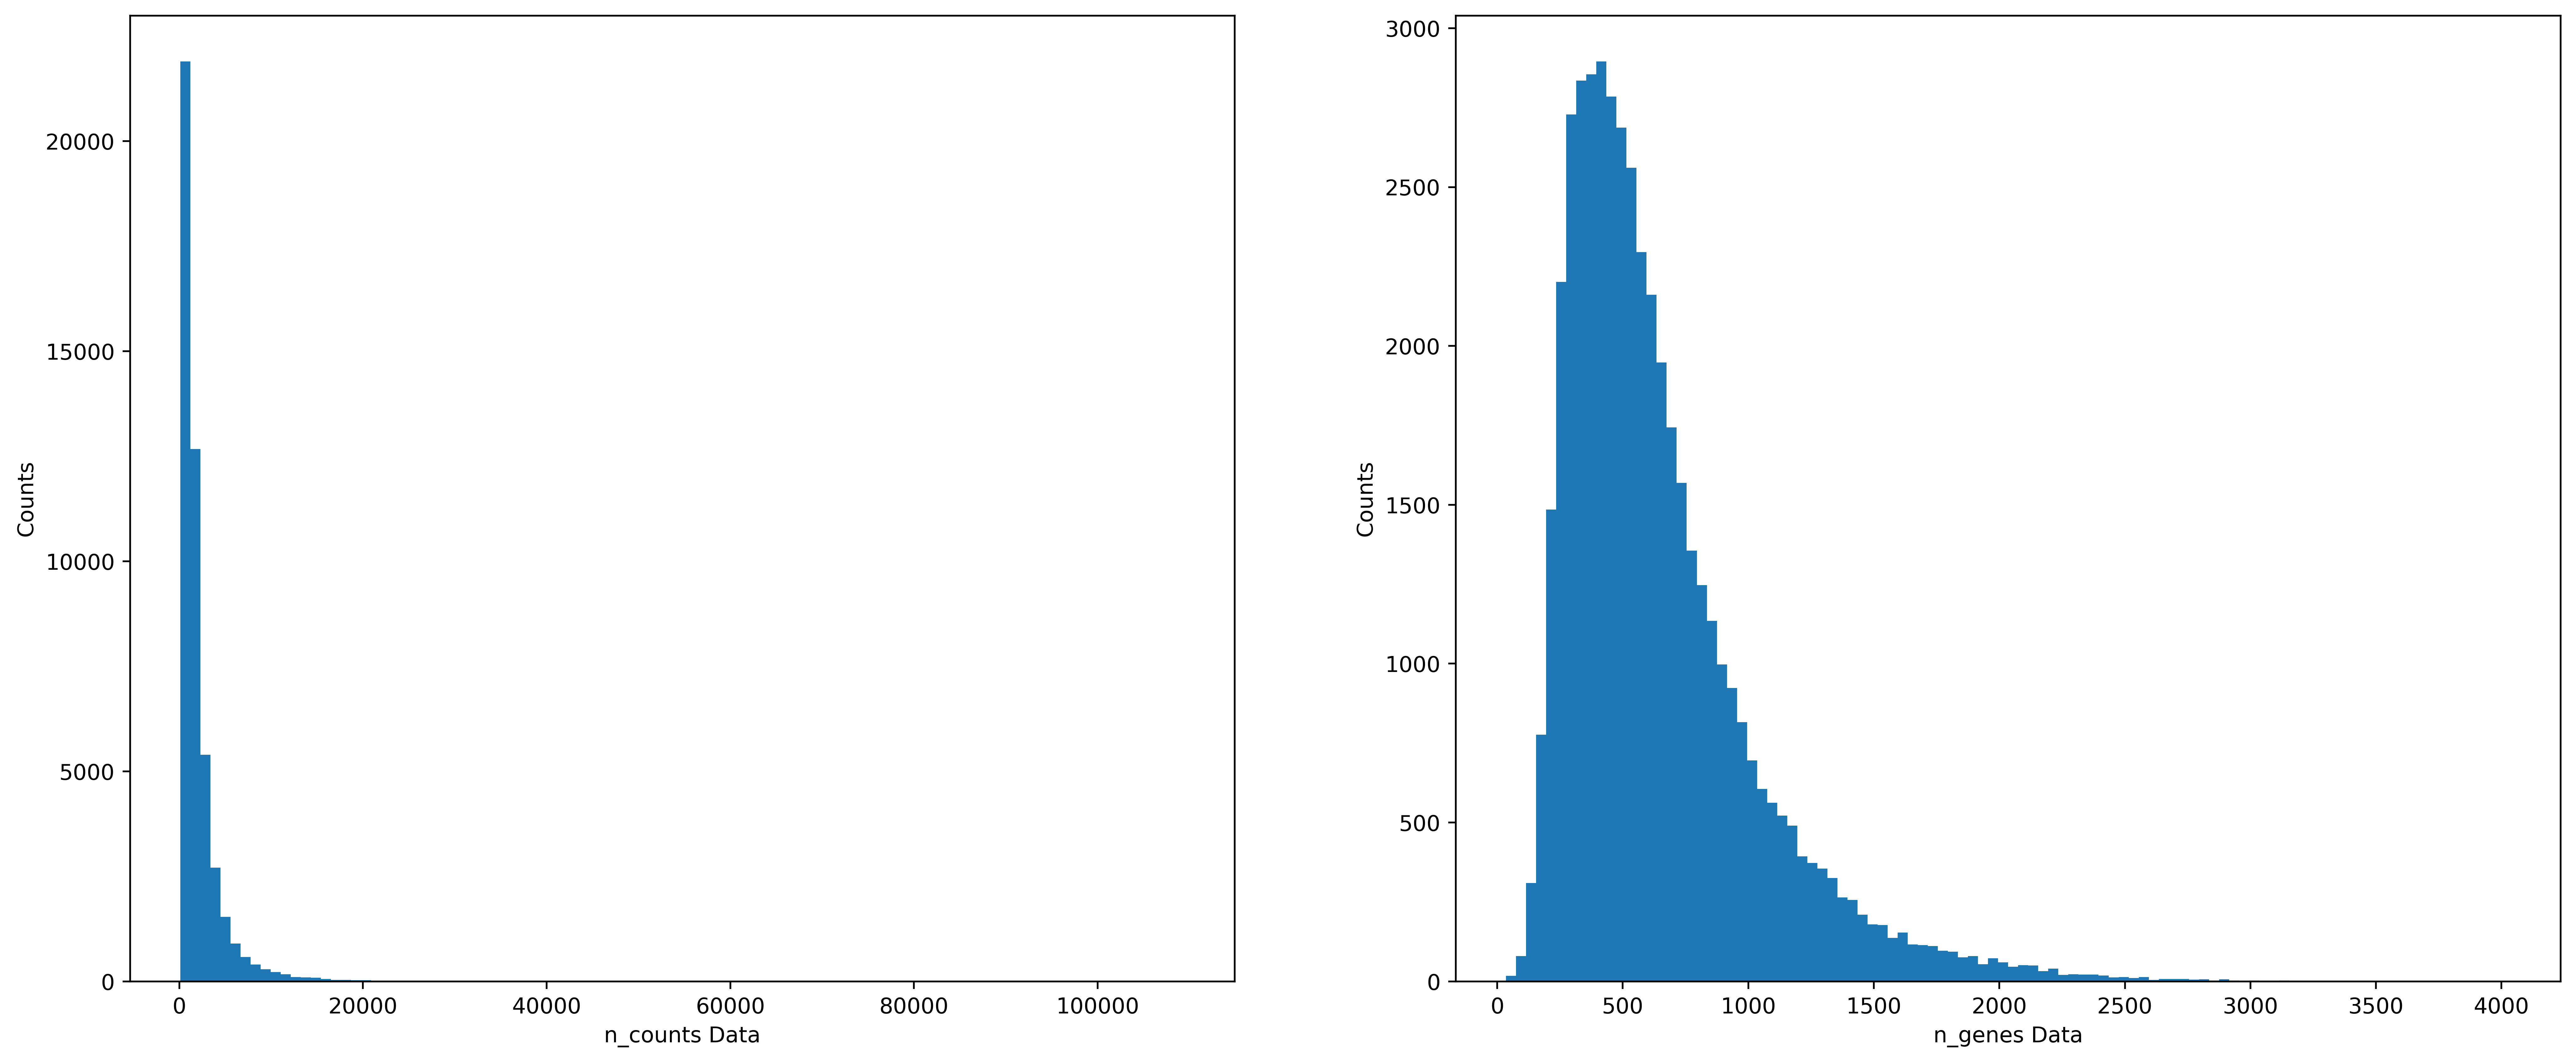

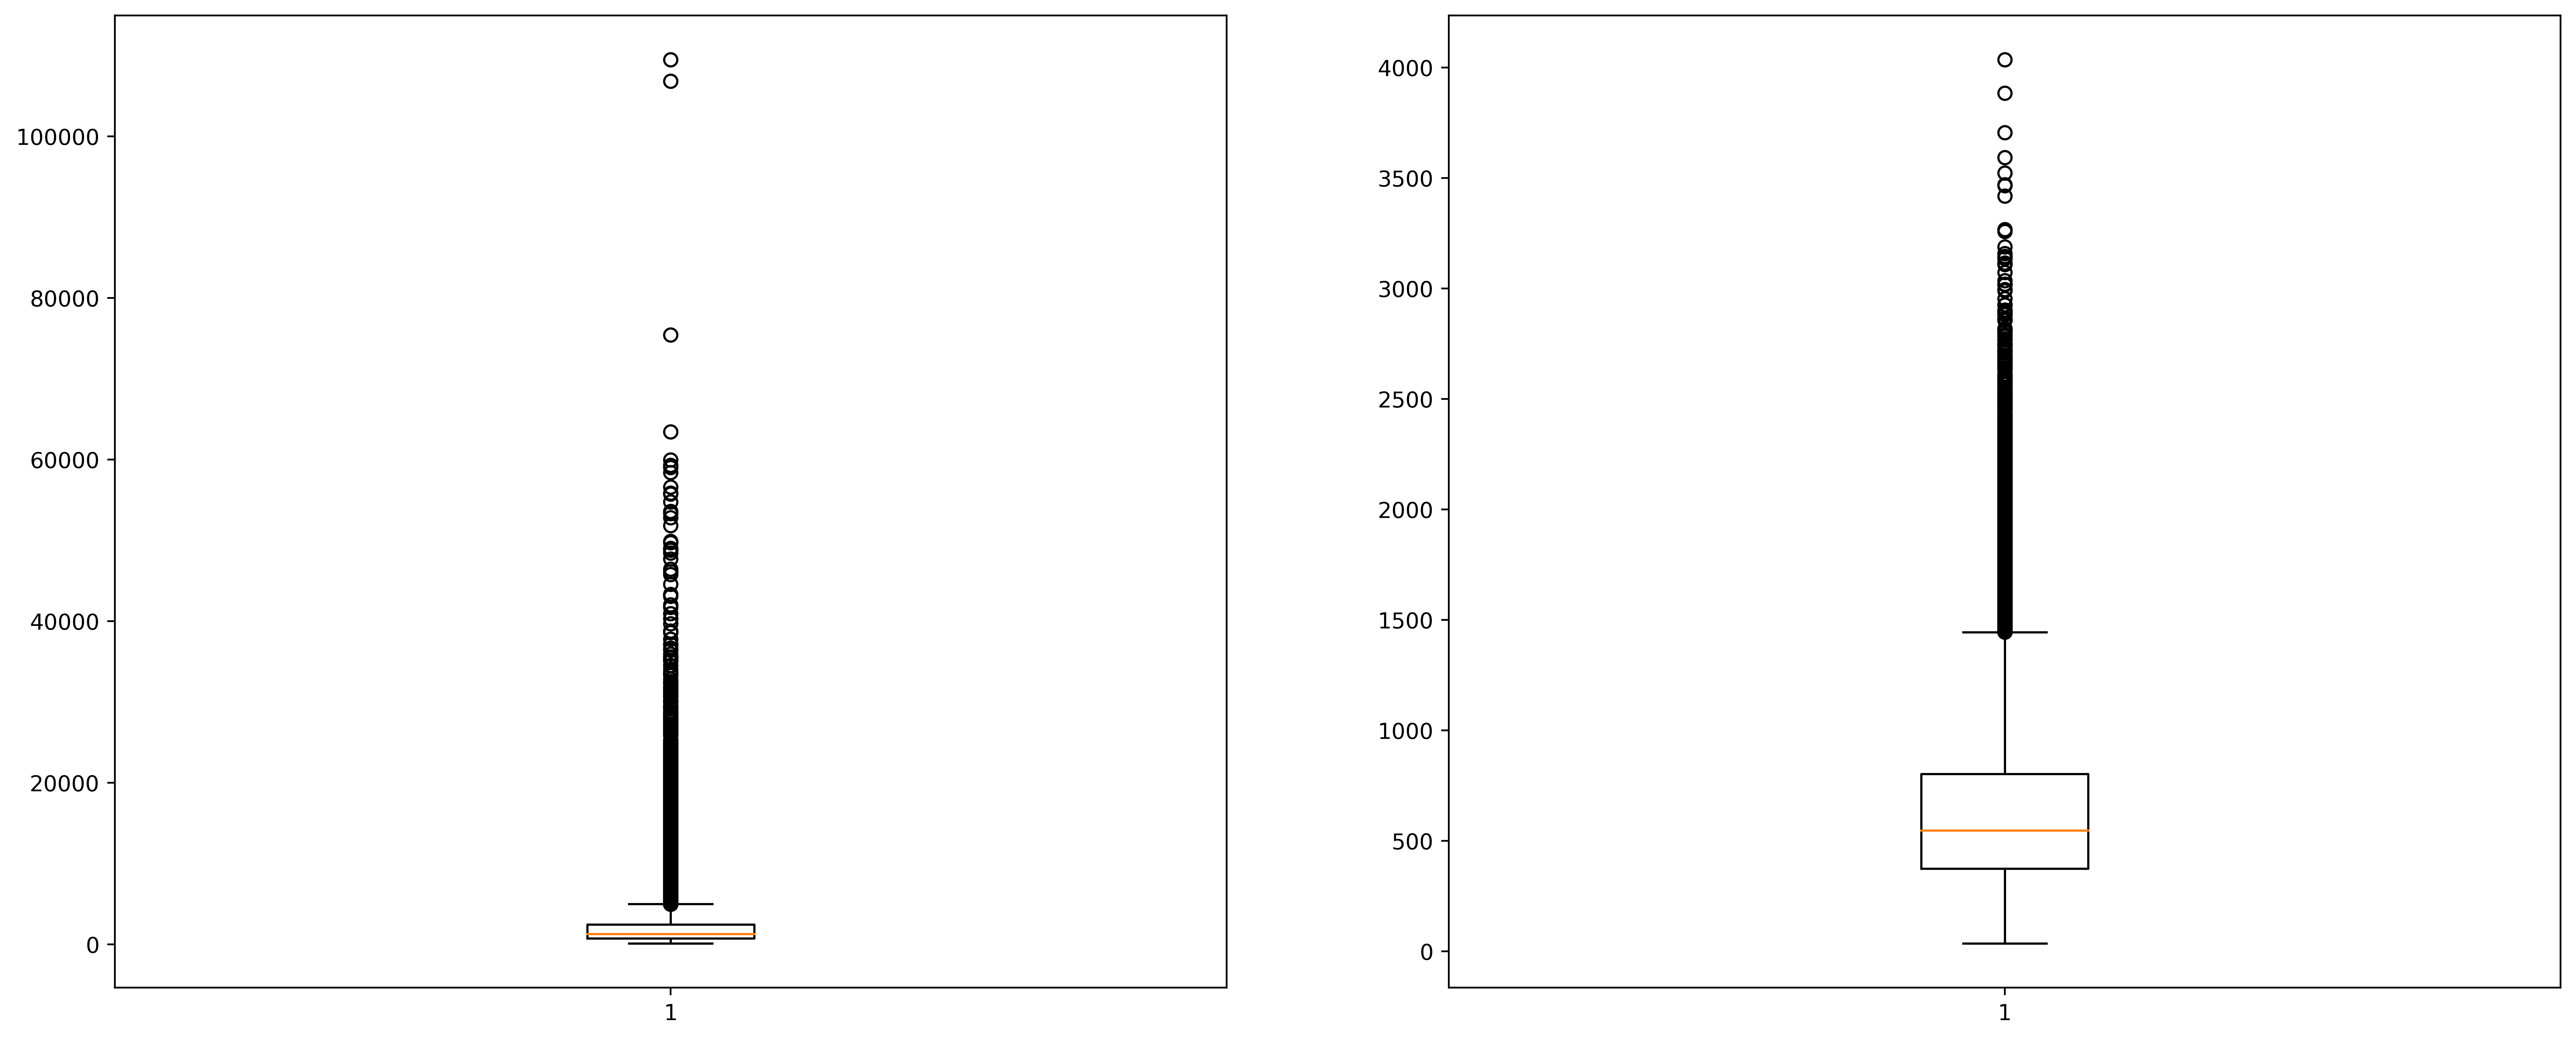

In [44]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(obs_df.n_counts, bins=100)  
ax1.set_ylabel('Counts')
ax1.set_xlabel('n_counts Data')

ax2.hist(obs_df.n_genes, bins=100)
ax2.set_ylabel('Counts')
ax2.set_xlabel('n_genes Data')
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.boxplot(obs_df.n_counts)  
ax2.boxplot(obs_df.n_genes)
plt.show()

# So we have some skewed data not sure if that is normal or not

## Evaluation of Var Data

In [45]:
var_df = ad_worm_aging.var
var_df

,gene_ids,gene_names,gene_class,n_counts,n_cells
homt-1,WBGene00022277,homt-1,protein_coding,9669.0,25254
nlp-40,WBGene00022276,nlp-40,protein_coding,98729.0,19002
rcor-1,WBGene00022278,rcor-1,protein_coding,13269.0,32038
Y74C9A.9,WBGene00235381,Y74C9A.9,pseudogene,562.0,2270
sesn-1,WBGene00022279,sesn-1,protein_coding,10096.0,26876
...,...,...,...,...,...
T23E7.6,WBGene00044772,T23E7.6,protein_coding,11616.0,14721
cgt-2,WBGene00017625,cgt-2,protein_coding,93.0,236
H11L12.1,WBGene00019189,H11L12.1,protein_coding,7204.0,14240
6R55.2,WBGene00007069,6R55.2,protein_coding,20.0,57


In [46]:
# Let's look at the gene_class
# Looks like the majority is protein_coding
gene_classes = var_df['gene_class'].unique()
print(f"Number of gene classes = {len(gene_classes)}\n")

gene_classes_freq = var_df['gene_class'].value_counts().to_frame().reset_index()
gene_classes_freq.columns = ['gene_class', 'counts']

total_counts = gene_classes_freq['counts'].sum()
gene_classes_freq['percent'] = gene_classes_freq.apply (lambda row: row['counts']/total_counts, axis=1)
gene_classes_freq

Number of gene classes = 6



,gene_class,counts,percent
0,protein_coding,17967,0.884856
1,ncRNA,1167,0.057474
2,pseudogene,962,0.047377
3,lincRNA,143,0.007043
4,antisense_RNA,62,0.003053
5,rRNA,4,0.000197


## Evaluation of the X Data

In [47]:
import pandas as pd
from scipy.sparse import csr_matrix

# Let's confirm the number of genes (47423 rows × 20305 columns)
# FROM PAPER: The final dataset contained 47,423 cells quantifying 20,305 genes across the full time series.
x_df = pd.DataFrame(data=csr_matrix.todense(ad_worm_aging.X))
x_df

,0,1,2,3,4,5,6,7,8,9,...,20295,20296,20297,20298,20299,20300,20301,20302,20303,20304
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
def check_detail_against_summary(x):
    # Let's count the number of genes in observation x
    observation_genes =x_df.iloc[x]
    gene_count_dtl = observation_genes[observation_genes > 0].count()
    gene_count_sum = int(obs_df["n_genes"].iloc[x])

    # Let's sum the expression values for all genes in observation x
    observation_genes =x_df.iloc[x]
    total_expression_dtl = observation_genes[observation_genes > 0].sum()
    total_expression_sum = int(obs_df["n_counts"].iloc[x])
    
    they_match = (gene_count_dtl==gene_count_sum and total_expression_dtl==total_expression_sum)
    return (they_match, gene_count_sum-gene_count_dtl, total_expression_sum-total_expression_dtl)

# Let's count the number of genes in observation one (The first observation)
results = check_detail_against_summary(0)    
# Let's see if they match
print(f'They match {results[0]}|',end =" ")
print(f'Gene_count off by {results[1]}',end =" ")
print(f'Total_expression off by {results[2]}')

# Looks like they match!!

They match True| Gene_count off by 0 Total_expression off by 0.0


In [49]:
# OK Lets check the whole dataframe
# CAUTION: This takes a few seconds to run maybe a minute
test_results = [check_detail_against_summary(x) for x in range(len(x_df))]
test_results_df = pd.DataFrame(test_results, columns =['Match', 'genes_off_by', 'counts_off_by'])
test_results_df
# Do NOT all match!

,Match,genes_off_by,counts_off_by
0,True,0,0.0
1,True,0,0.0
2,True,0,0.0
3,True,0,0.0
4,True,0,0.0
...,...,...,...
47418,True,0,0.0
47419,True,0,0.0
47420,True,0,0.0
47421,False,1,1.0


In [50]:
did_not_match_count = test_results_df.Match[test_results_df.Match == False].count()
print(f'Failed to match count {did_not_match_count:,} observations {did_not_match_count/len(test_results_df):.2%}')
has_negative_value = test_results_df.genes_off_by[test_results_df.genes_off_by < 0].count()
print(f'Number of times that detail data had more genes than summary {has_negative_value}')
# Looks like 
print(test_results_df.describe())

Failed to match count 10,994 observations 23.18%
Number of times that detail data had more genes than summary 0
       genes_off_by  counts_off_by
count  47423.000000   47423.000000
mean       0.331611       0.376357
std        0.822062       2.220048
min        0.000000       0.000000
25%        0.000000       0.000000
50%        0.000000       0.000000
75%        0.000000       0.000000
max       36.000000     398.000000


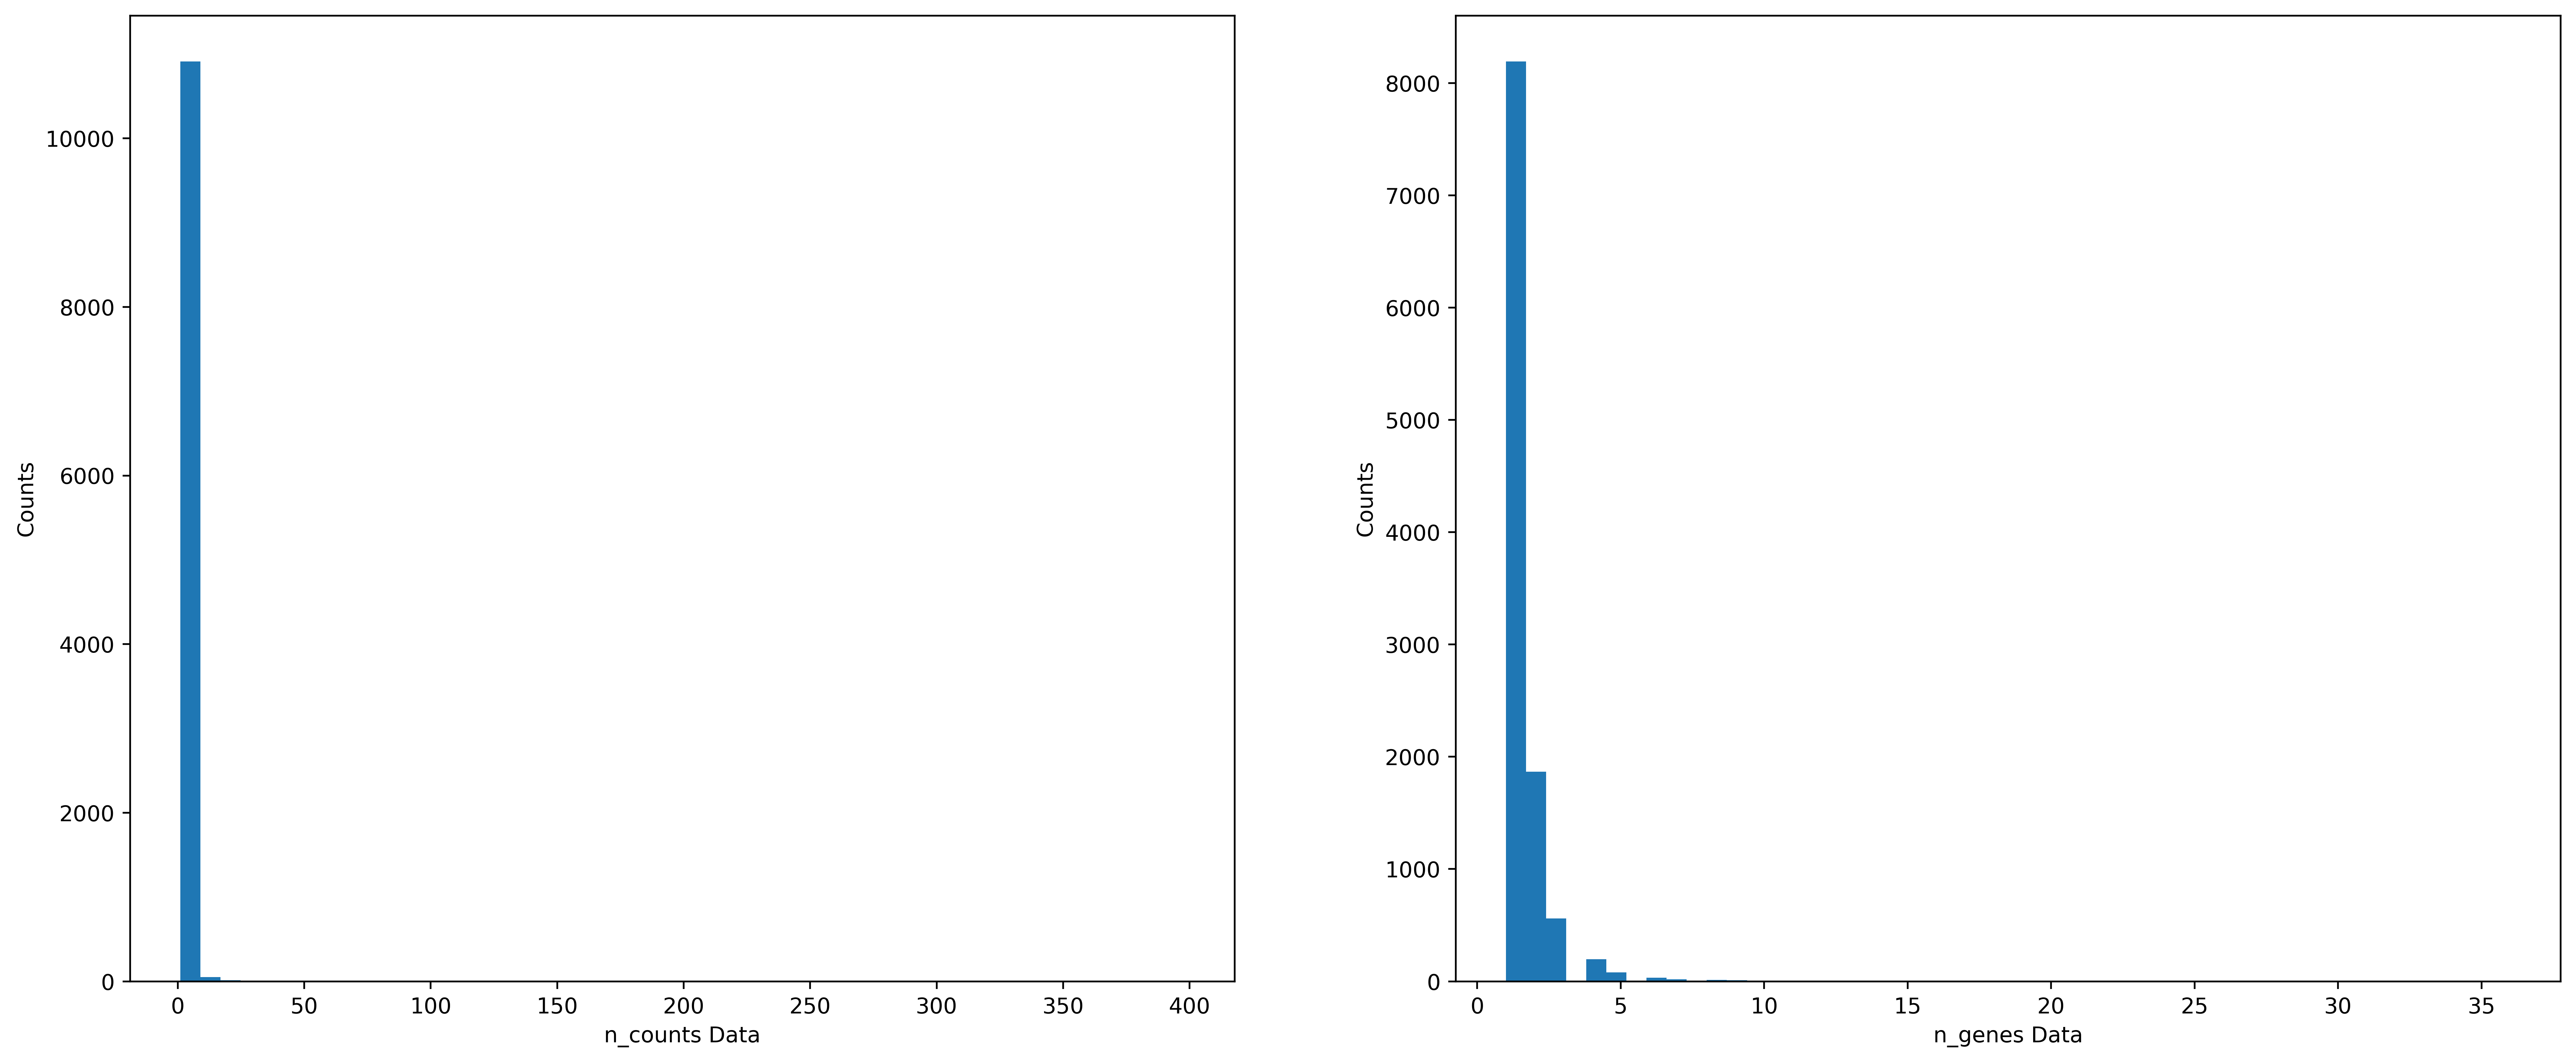

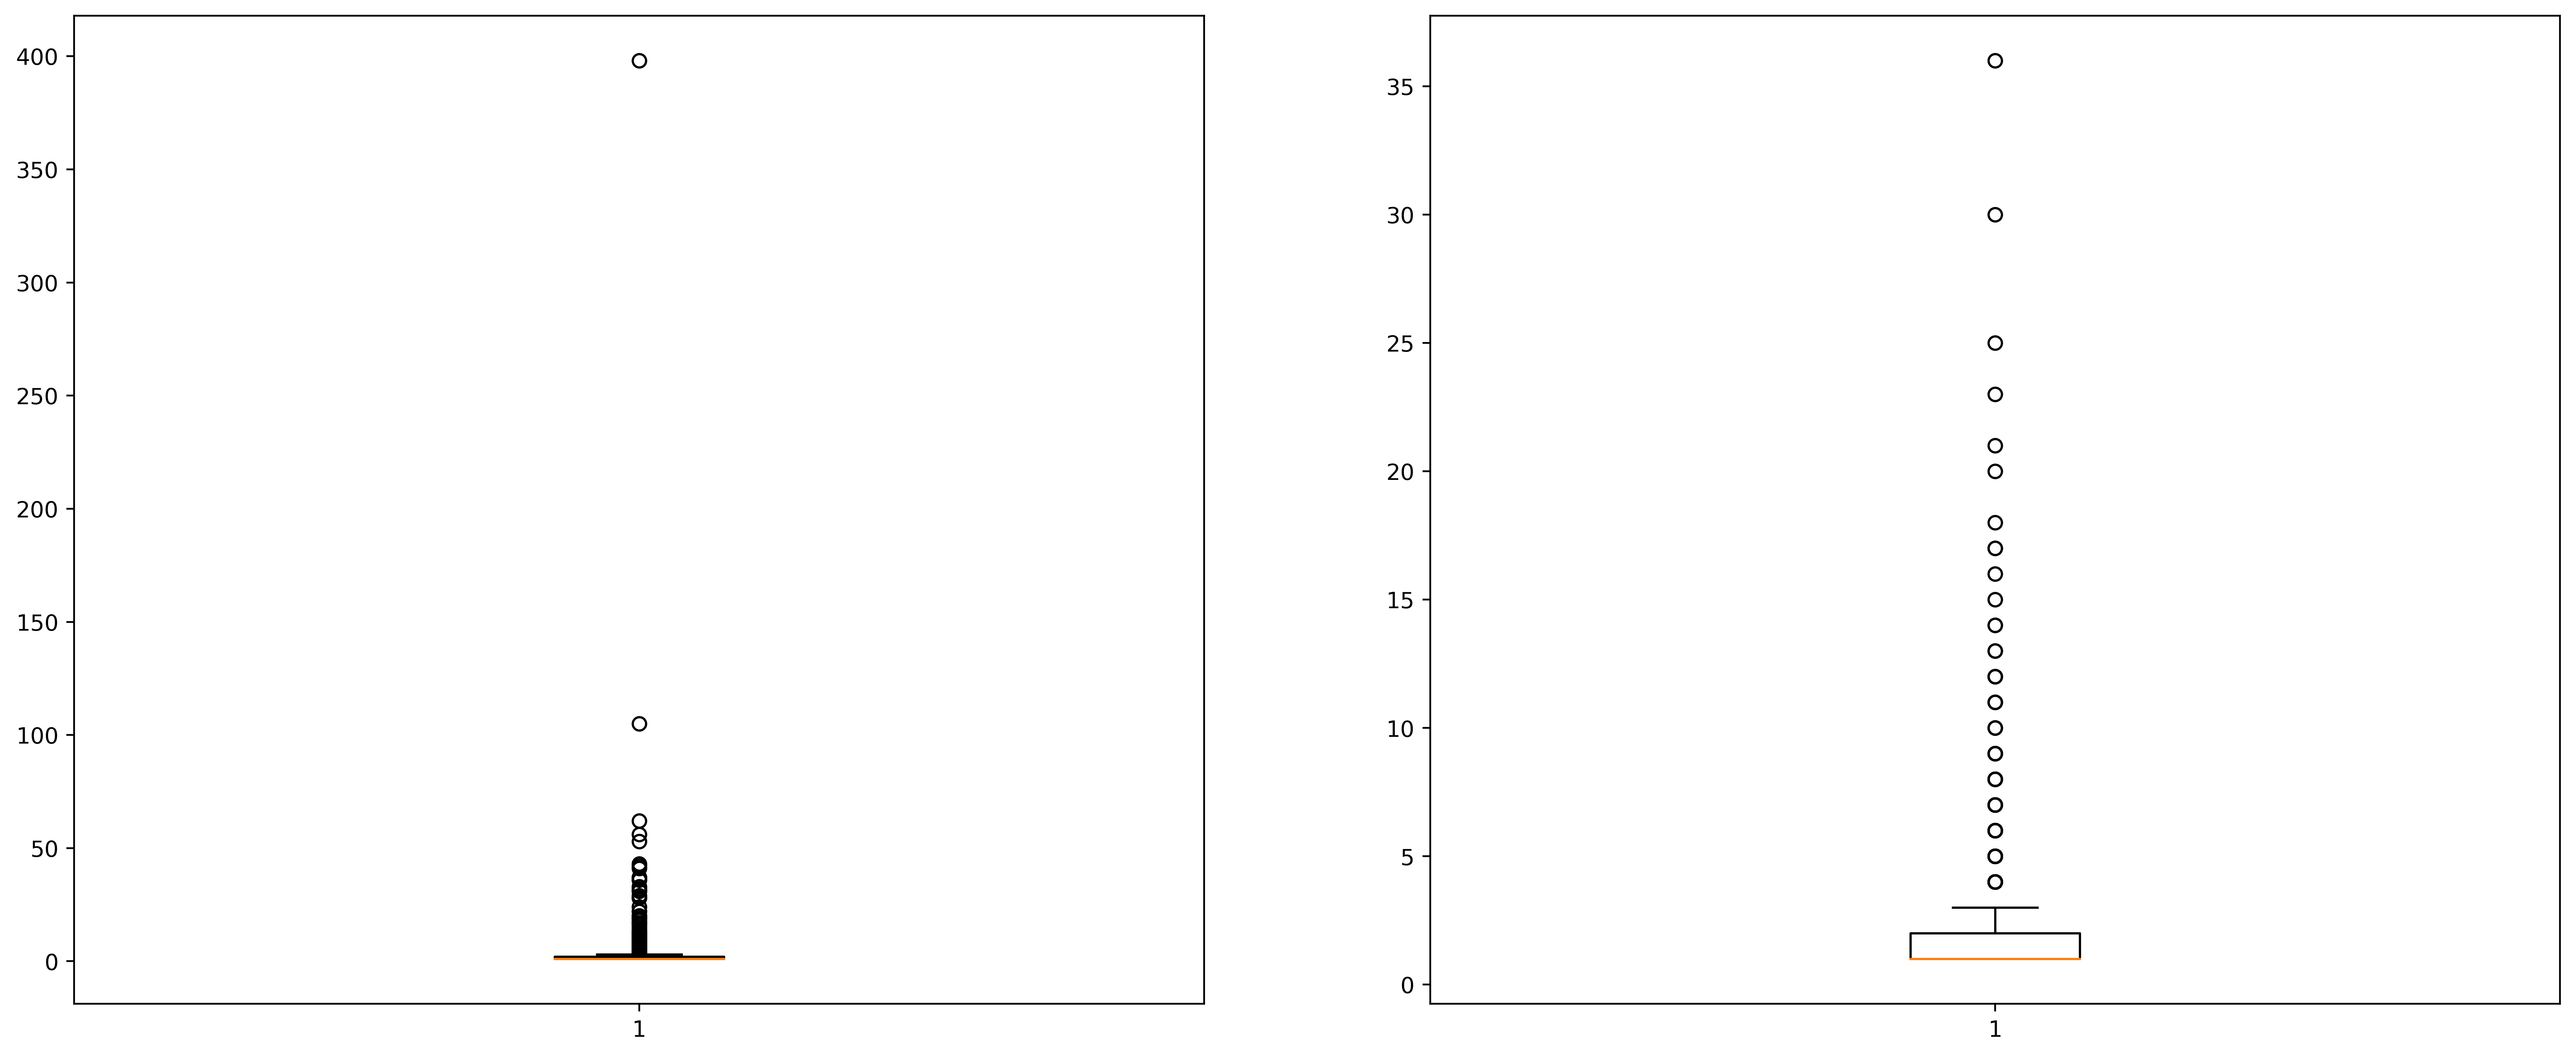

In [51]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(test_results_df.counts_off_by[test_results_df.Match == False], bins=50)  
ax1.set_ylabel('Counts')
ax1.set_xlabel('n_counts Data')

ax2.hist(test_results_df.genes_off_by[test_results_df.Match == False], bins=50)
ax2.set_ylabel('Counts')
ax2.set_xlabel('n_genes Data')
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.boxplot(test_results_df.counts_off_by[test_results_df.Match == False])  
ax2.boxplot(test_results_df.genes_off_by[test_results_df.Match == False])
plt.show()


## Evaluation of obsm: 'X_umap', 'scvi'

In [52]:
X_umap = ad_worm_aging.obsm['X_umap']
print(type(X_umap))
print(X_umap.shape)
print(X_umap)
print(X_umap.T)

<class 'numpy.ndarray'>
(47423, 2)
[[ 11.996049   -4.5285397]
 [ 11.966536   -4.5639434]
 [ 12.13793    -4.6060185]
 ...
 [  8.334566   -3.9024909]
 [ 14.051341   -5.063011 ]
 [  2.0279794 -14.025132 ]]
[[ 11.996049   11.966536   12.13793   ...   8.334566   14.051341
    2.0279794]
 [ -4.5285397  -4.5639434  -4.6060185 ...  -3.9024909  -5.063011
  -14.025132 ]]


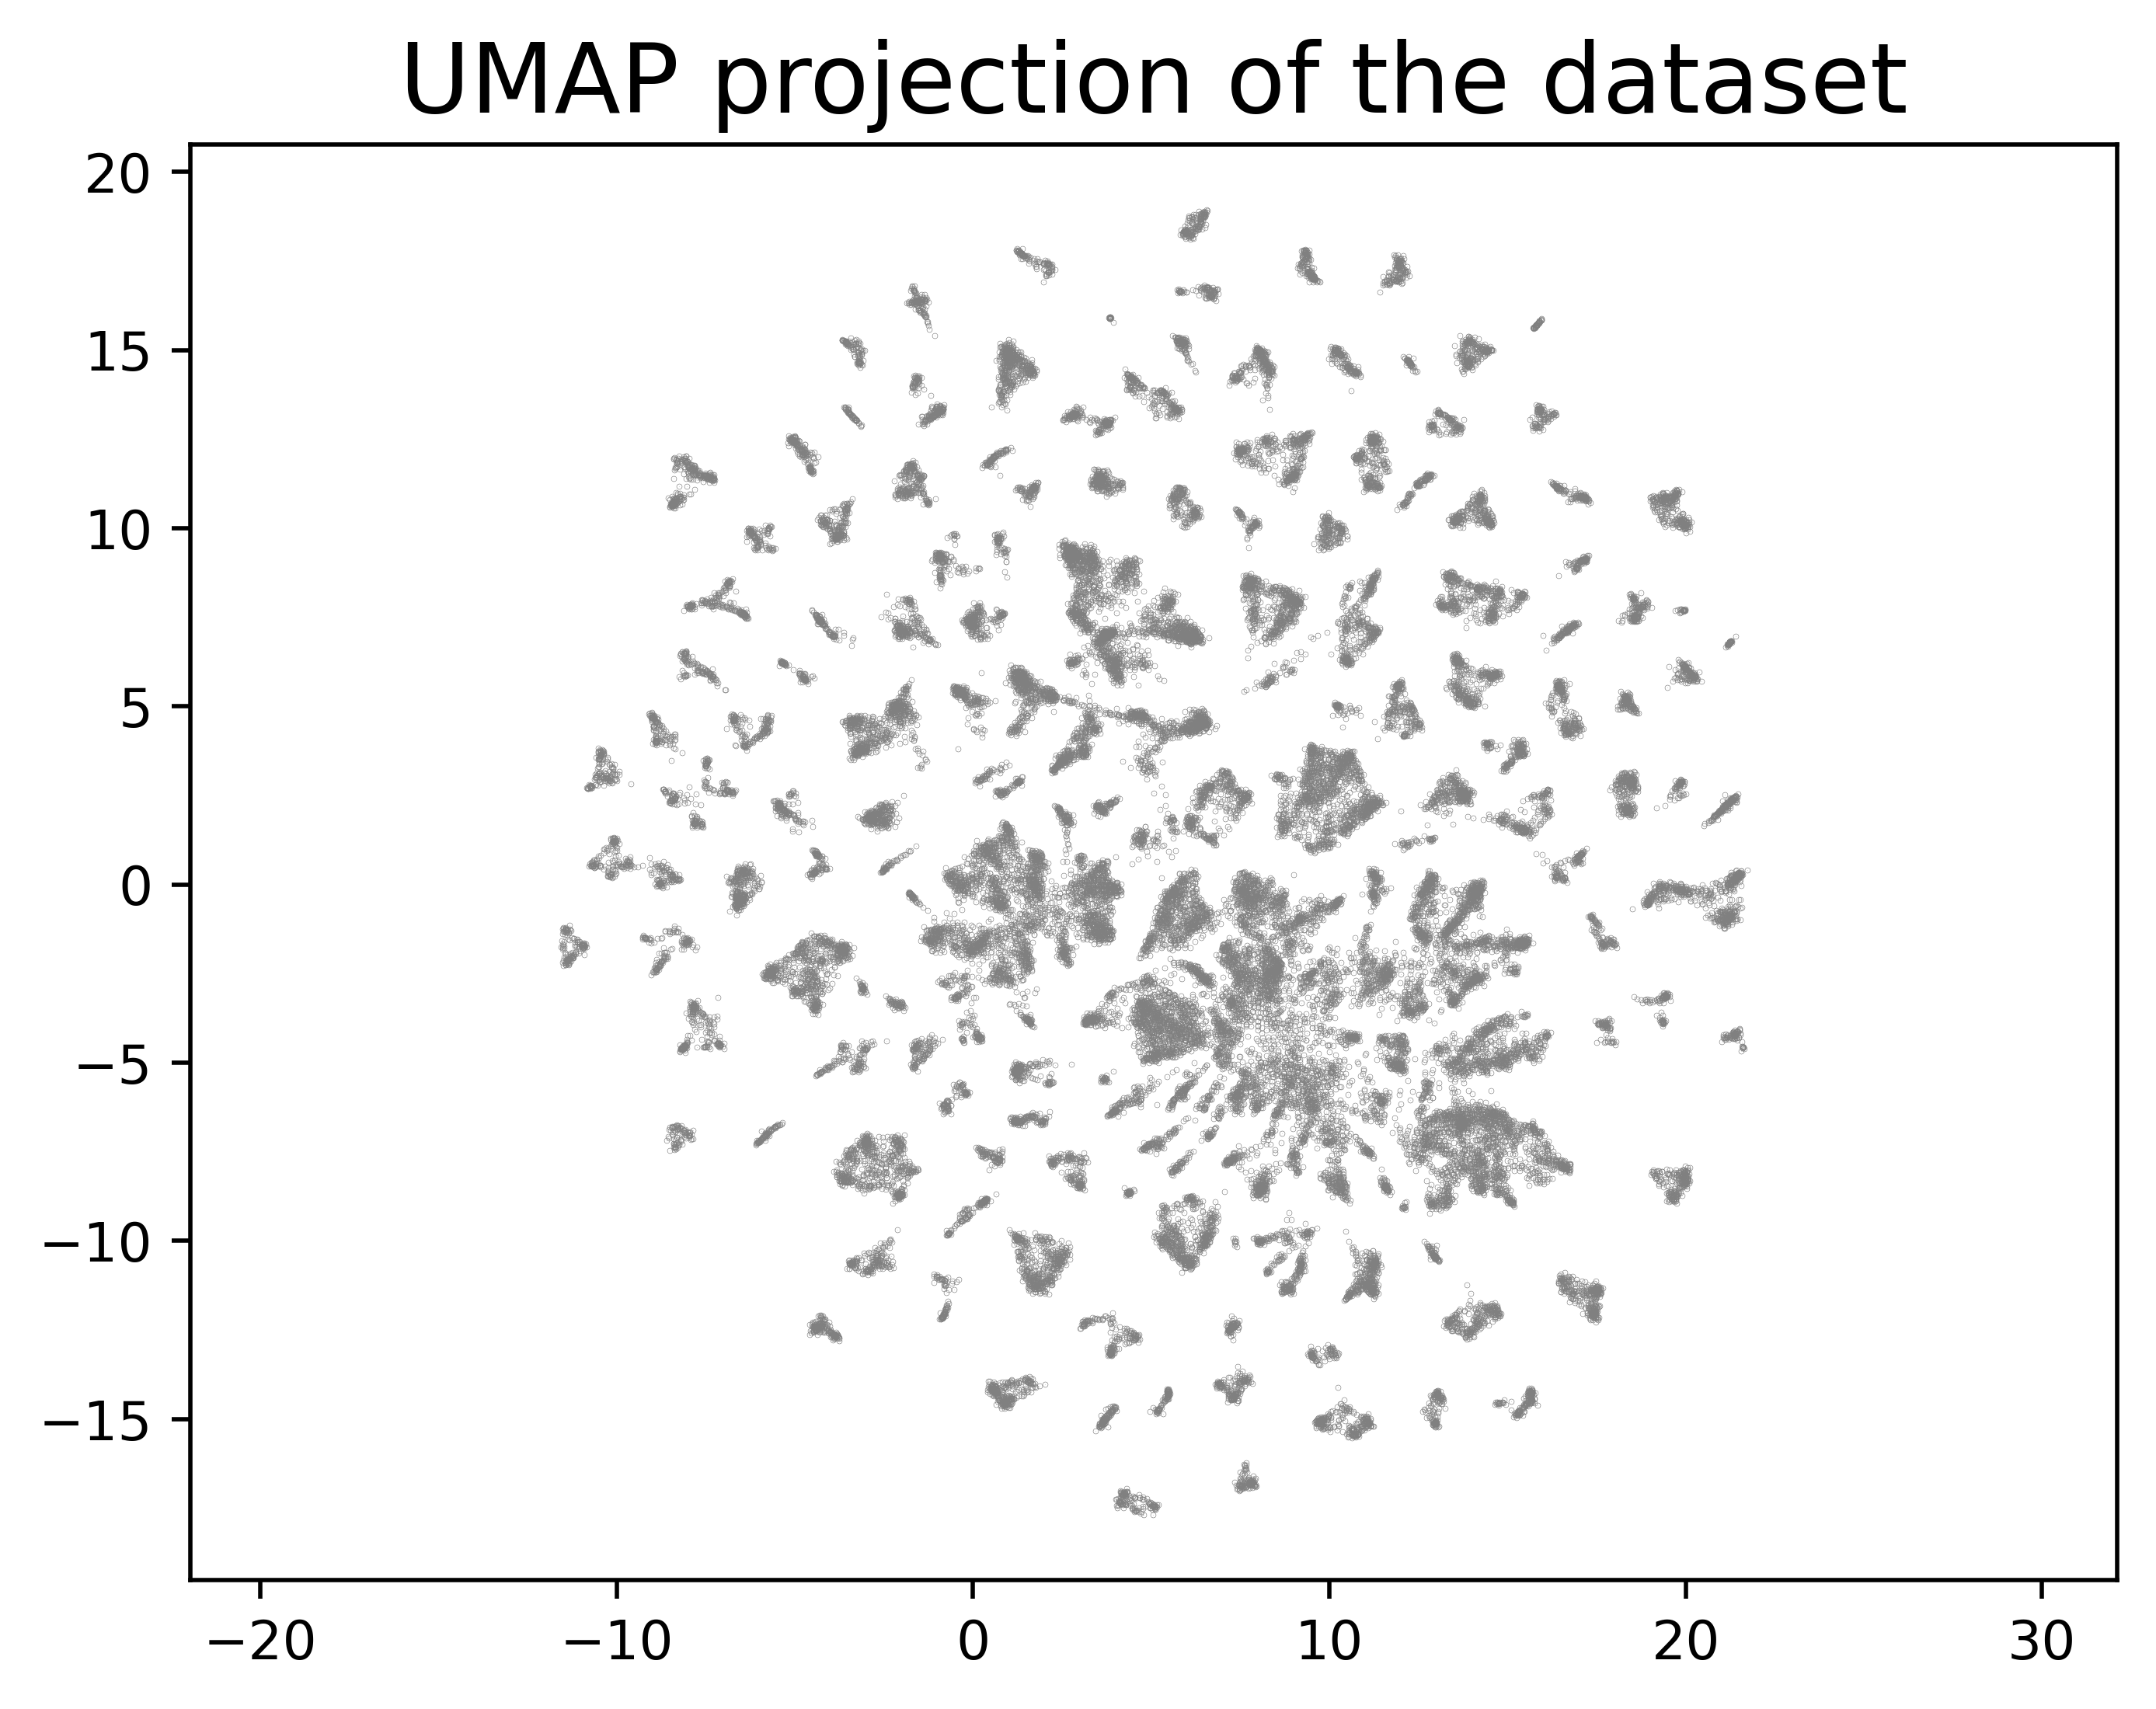

In [53]:
plt.rcParams['figure.dpi'] = 500
#plt.scatter(X_umap.T[0],X_umap.T[1],  cmap='Spectral', s=.01)
plt.scatter(X_umap.T[0],X_umap.T[1], c='grey',  s=.008)
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the dataset', fontsize=18);

In [54]:
scvi = ad_worm_aging.obsm['scvi']
print(type(scvi))
print(scvi.shape)
scvi

<class 'numpy.ndarray'>
(47423, 128)


array([[-2.8601238e-03, -3.6057937e-01,  2.2992499e-02, ...,
         1.0099828e+00,  2.0524333e+00,  4.6516603e-01],
       [-1.7703859e-02,  4.4567621e-01,  1.5674811e-03, ...,
         1.2887740e+00,  1.7776818e+00, -3.6413932e-01],
       [-8.3076730e-03, -3.1160879e-01,  1.4139132e-02, ...,
         1.9660005e-01,  2.2204216e+00,  7.1566844e-01],
       ...,
       [ 1.3325818e-02, -1.7872453e-02,  5.8335597e-03, ...,
         1.2706075e+00, -3.3447820e-01,  2.9574472e-01],
       [ 2.8764224e-04,  1.4553352e-01,  5.1925639e-03, ...,
         1.3243618e+00, -3.1384420e-01,  1.0585635e+00],
       [ 1.4282400e-02,  1.2543242e-01,  6.8554375e-03, ...,
         9.3107188e-01,  2.3856193e-01, -2.0160651e-01]], dtype=float32)

## Extract data for testing on Wormcat

In [26]:
# For this test we will 
# 1. Extract the Wormbase ID's related to BW Muscles and intestine (use all days)
# 2. Sort the data by n_counts
# 3. Select the top 1,000 Genes for Cell Type

# x_df is all the raw data 
# every observation (47,423) mapped to every gene (20,305)
# genes with no expression have a zero value
x_df = pd.DataFrame(data=csr_matrix.todense(ad_worm_aging.X))

# obs_df is a list of every observation mapped to annotate_name (i.e, Cell Type)
obs_df = ad_worm_aging.obs
obs_df.reset_index(drop=True,inplace=True)
obs_df

var_df = ad_worm_aging.var
var_df.reset_index(drop=True,inplace=True)
var_df

# bw_muscles = ['4_0:BW muscles', '4_1:BW muscles', '1_1:BW muscles']
# intestines = ['3_4:intestine', '3_2:intestine', '3_1:intestine', '3_5:intestine']



,gene_ids,gene_names,gene_class,n_counts,n_cells
0,WBGene00022277,homt-1,protein_coding,9669.0,25254
1,WBGene00022276,nlp-40,protein_coding,98729.0,19002
2,WBGene00022278,rcor-1,protein_coding,13269.0,32038
3,WBGene00235381,Y74C9A.9,pseudogene,562.0,2270
4,WBGene00022279,sesn-1,protein_coding,10096.0,26876
...,...,...,...,...,...
20300,WBGene00044772,T23E7.6,protein_coding,11616.0,14721
20301,WBGene00017625,cgt-2,protein_coding,93.0,236
20302,WBGene00019189,H11L12.1,protein_coding,7204.0,14240
20303,WBGene00007069,6R55.2,protein_coding,20.0,57


In [26]:

# Given an observation get the associated gene data
# If a gene is referenced more than once accumulate the n_counts
def get_gene_data_for_observation(obs_loc, x_df, gene_data_df=None):
    if gene_data_df is None:
        gene_data_df = pd.DataFrame(columns=['gene_id','n_counts'])
    observation_genes =x_df.iloc[obs_loc]
    for index, value in observation_genes.iteritems():
        if value > 0: 
            if len(gene_data_df.loc[gene_data_df['gene_id'] == index]):
                gene_data_df.loc[gene_data_df['gene_id']==index,'n_counts'] += value
            else:
                row = {'gene_id': index, 'n_counts': value}
                gene_data_df.loc[gene_data_df.shape[0]]=row
    return gene_data_df

# Given a gene index location return the wormbase id
def get_wormbase_id_for_gene_id(gene_loc, var_df):
    gene_loc = int(gene_loc)
    var_df_loc_dict = var_df.iloc[gene_loc].to_dict()
    return var_df_loc_dict['gene_ids']

# Given a gene index location return the wormbase id
def get_wormbase_id_for_gene_name(gene_loc, var_df):
    gene_loc = int(gene_loc)
    var_df_loc_dict = var_df.iloc[gene_loc].to_dict()
    return var_df_loc_dict['gene_names']

# Given a cell_type and a timepoint get the genes related data from the raw data set (x_df)
# accumulate the results of the n_counts and attach a wormbase_id and sort by n_counts decending order
def get_gene_data_for_cell_type_and_timepoint(cell_type, timepoint, obs_df, var_df, x_df):
    obs_subset_df = obs_df.loc[(obs_df['annotate_name'] == cell_type) & (obs_df['timepoint'] == timepoint)]
    gene_data_df = None
    for observation in obs_subset_df.index:
        gene_data_df = get_gene_data_for_observation(observation, x_df, gene_data_df)
    if gene_data_df is not None:
        gene_data_df['Wormbase ID'] = gene_data_df.apply (lambda row: get_wormbase_id_for_gene_id(row['gene_id'],var_df), axis=1)
        gene_data_df['gene_names'] = gene_data_df.apply (lambda row: get_wormbase_id_for_gene_name(row['gene_id'],var_df), axis=1)
        gene_data_df.drop('gene_id', inplace=True, axis=1)
        gene_data_df = gene_data_df.sort_values(by=['n_counts'], ascending=False)
        gene_data_df.reset_index(drop=True,inplace=True)
        gene_data_df = gene_data_df.reindex(columns=['Wormbase ID','gene_names','n_counts'])
    return gene_data_df

# Create an excel sheet that can be fed to wormcat
def write_data_to_excel(cell_type, cutoff, days_dfs):
    cell_type = cell_type.replace(" ", "-")
    cell_type = cell_type.replace("/", "")
    cell_type = cell_type.replace("\\", "")
    writer = pd.ExcelWriter(f'{cell_type}_{cutoff}.xlsx', engine='xlsxwriter')
    for key in days_dfs.keys():
        days_dfs[key].to_excel(writer, sheet_name=key, index=False)
    writer.save()



In [27]:
# CAUTION: This could take a long time to to run depending on the configuration
# Minutes to hours!!

import warnings
warnings.filterwarnings('ignore')

bw_muscles = ['4_0:BW muscles', '4_1:BW muscles', '1_1:BW muscles']
intestines = ['3_4:intestine', '3_2:intestine', '3_1:intestine', '3_5:intestine']
days = ['d1', 'd3', 'd5', 'd8', 'd11', 'd15']
cutoffs = [500,1000,1500,2000]


cell_types = bw_muscles + intestines

# Comment out the below to get the full run back!!
cell_types= ['58_1:pharyngeal inter neurons 1/3/6']

for cutoff in cutoffs:
    print(f"Processing cutoff {cutoff}")
    for cell_type in cell_types:
        print(f"Processing cell_type {cell_type}")
        days_dfs={}
        for timepoint in days:
            #print(f"Processing timepoint {timepoint}")
            gene_data_df = get_gene_data_for_cell_type_and_timepoint(cell_type, timepoint, obs_df, var_df, x_df)
            # Create an arbitrary cut off of genes
            if gene_data_df is not None:
                gene_data_df = gene_data_df[gene_data_df.index < cutoff] 
                days_dfs[timepoint]=gene_data_df
        write_data_to_excel(cell_type, cutoff, days_dfs)
     

        
        

Processing cutoff 500
Processing cell_type 58_1:pharyngeal inter neurons 1/3/6
Processing cutoff 1000
Processing cell_type 58_1:pharyngeal inter neurons 1/3/6
Processing cutoff 1500
Processing cell_type 58_1:pharyngeal inter neurons 1/3/6
Processing cutoff 2000
Processing cell_type 58_1:pharyngeal inter neurons 1/3/6


### Analyze the Murphy data

In [27]:
import pandas as pd
murphy_ts_dict = pd.read_excel('./Murphy_TS.xlsx', sheet_name=["intestine","muscle"])
murphy_intestine_df = murphy_ts_dict.get('intestine')
murphy_muscle_df = murphy_ts_dict.get('muscle')
murphy_muscle_df.head()

/home/dan/anaconda3/envs/amy-dev/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/dan/anaconda3/envs/amy-dev/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Wormbase ID
0,WBGene00001386
1,WBGene00003934
2,WBGene00000066
3,WBGene00003370
4,WBGene00001385


In [28]:
bw_muscles = ['4_0:BW muscles', '4_1:BW muscles', '1_1:BW muscles']
intestines = ['3_4:intestine', '3_2:intestine', '3_1:intestine', '3_5:intestine']
murphy_dfs = [(murphy_muscle_df,'muscle'),(murphy_intestine_df,'intestine')]
for murphy_df in murphy_dfs:
    print()
    for cell_type in bw_muscles+intestines:
        murphy_ts_dict = pd.read_excel(f'./{cell_type}_500.xlsx', None)
        kenyon_muscle_df = murphy_ts_dict.get(list(murphy_ts_dict.keys())[0])
        kenyon_in_murphy = kenyon_muscle_df['Wormbase ID'].isin(murphy_df[0]['Wormbase ID'])
        similar_test = kenyon_in_murphy.value_counts()
        similar_true = similar_test.iloc[0]
        similar_false = similar_test.iloc[1]

        print(f'murphy_{murphy_df[1]: <10} {cell_type:<15} {(round(similar_false/(similar_true+similar_false),2))*100:.0f}%')


FileNotFoundError: [Errno 2] No such file or directory: './4_0:BW muscles_500.xlsx'